# Online Sales by Country Prediction

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
import statsmodels.formula.api as smf 
from scipy import stats
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


## Loading Files

In [2]:
goo = pd.read_csv('data/googleuft8.txt',parse_dates=[1])
goo.head()

,Country,Date,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Booking (Goal 1 Conversion Rate),Booking (Goal 1 Completions),Booking (Goal 1 Value)
0,India,2019-06-11,703,703,703,0.9986,1.00,0.10,0.2461,173,0
1,United States,2019-06-14,688,683,690,0.9913,1.02,0.18,0.2246,155,0
2,Singapore,2019-06-11,654,654,654,1.0000,1.00,0.00,0.2401,157,0
3,United States,2019-06-11,639,639,641,0.9875,1.05,2.66,0.2512,161,0
4,United States,2019-06-15,625,622,625,1.0000,1.00,0.00,0.2928,183,0


In [3]:
sa = pd.read_csv('data/sales.csv', parse_dates=[1]) 
sa.head()

,ticketNumber,Date,tripId,ticketStatus,tripName,tripAbbreviation,taxAbbreviation,startDate,tripCategoryId,GrossTicket,Commission,NetTicket,invoiceId,invoiceStatus,groupId,Sales Office Invoice,gender,dateOfBirth,countryOfOriginId,countryName
0,4203-E81,2019-04-05,4203,2,Niagara Falls - Saturday,NF,HST,2019-04-20,1,59.0,0,59.0,105932,2,NaN,ISX Online,Female,1986-10-09,73.0,France
1,4203-SXF,2019-04-05,4203,2,Niagara Falls - Saturday,NF,HST,2019-04-20,1,59.0,0,59.0,105933,2,NaN,ISX Online,Female,1997-09-07,73.0,France
2,4203-UEW,2019-04-05,4203,2,Niagara Falls - Saturday,NF,HST,2019-04-20,1,59.0,0,59.0,105934,2,NaN,ISX Online,Male,2007-05-26,38.0,Canada
3,4217-2KH,2019-04-05,4217,2,ISX Sunset Boat Cruise Party (NEW BUS DEPARTUR...,BC,HST,2019-04-26,3,25.0,0,25.0,105935,2,NaN,ISX Online,Male,1987-11-10,30.0,Brazil
4,4217-I9I,2019-04-05,4217,2,ISX Sunset Boat Cruise Party (NEW BUS DEPARTUR...,BC,HST,2019-04-26,3,25.0,0,25.0,105936,2,NaN,ISX Online,Female,2000-06-30,30.0,Brazil


In [4]:
goo.index

RangeIndex(start=0, stop=3423, step=1)

In [5]:
sa.index

RangeIndex(start=0, stop=899, step=1)

In [6]:
goo.dtypes

Country                                     object
Date                                datetime64[ns]
Users                                        int64
New Users                                    int64
Sessions                                     int64
Bounce Rate                                float64
Pages / Session                            float64
Avg. Session Duration                      float64
Booking (Goal 1 Conversion Rate)           float64
Booking (Goal 1 Completions)                 int64
Booking (Goal 1 Value)                       int64
dtype: object

In [7]:
sa.dtypes

ticketNumber                    object
Date                    datetime64[ns]
tripId                           int64
ticketStatus                     int64
tripName                        object
tripAbbreviation                object
taxAbbreviation                 object
startDate                       object
tripCategoryId                   int64
GrossTicket                    float64
Commission                       int64
NetTicket                      float64
invoiceId                        int64
invoiceStatus                    int64
groupId                        float64
Sales Office Invoice            object
gender                          object
dateOfBirth                     object
countryOfOriginId              float64
countryName                     object
dtype: object

In [8]:
sa_original = sa.copy() #copy to keep original

In [9]:
goo_original = goo.copy() #copy to keep original

## Organizing and Cleaning Data

In [10]:
goo.sort_values('Date', ascending=True, inplace=True) #sort by date
goo.head()

,Country,Date,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Booking (Goal 1 Conversion Rate),Booking (Goal 1 Completions),Booking (Goal 1 Value)
2886,Panama,2019-04-05,1,1,1,0.0000,2.00,159.00,0.0,0,0
2560,Japan,2019-04-05,1,1,1,1.0000,1.00,0.00,0.0,0,0
1909,Brazil,2019-04-05,1,1,1,1.0000,1.00,0.00,0.0,0,0
1740,United States,2019-04-05,2,2,2,0.5000,5.50,949.50,0.0,0,0
463,Canada,2019-04-05,21,20,22,0.5455,4.23,182.32,0.0,0,0


In [11]:
goo = goo.reset_index(drop=True) #reset index...
goo.head()

,Country,Date,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Booking (Goal 1 Conversion Rate),Booking (Goal 1 Completions),Booking (Goal 1 Value)
0,Panama,2019-04-05,1,1,1,0.0000,2.00,159.00,0.0,0,0
1,Japan,2019-04-05,1,1,1,1.0000,1.00,0.00,0.0,0,0
2,Brazil,2019-04-05,1,1,1,1.0000,1.00,0.00,0.0,0,0
3,United States,2019-04-05,2,2,2,0.5000,5.50,949.50,0.0,0,0
4,Canada,2019-04-05,21,20,22,0.5455,4.23,182.32,0.0,0,0


In [12]:
#drop unecessary columns
goo.drop(['Bounce Rate','Pages / Session','Avg. Session Duration','Booking (Goal 1 Conversion Rate)','Booking (Goal 1 Completions)','Booking (Goal 1 Value)'],axis=1, inplace=True)
goo.head()

,Country,Date,Users,New Users,Sessions
0,Panama,2019-04-05,1,1,1
1,Japan,2019-04-05,1,1,1
2,Brazil,2019-04-05,1,1,1
3,United States,2019-04-05,2,2,2
4,Canada,2019-04-05,21,20,22


In [13]:
goo.drop(['New Users','Sessions'],axis=1, inplace=True)
goo.head()

,Country,Date,Users
0,Panama,2019-04-05,1
1,Japan,2019-04-05,1
2,Brazil,2019-04-05,1
3,United States,2019-04-05,2
4,Canada,2019-04-05,21


In [14]:
#drop unecessary columns of the second file
sa.drop(['ticketNumber','tripId','ticketStatus','tripName','tripCategoryId','invoiceId','invoiceStatus','groupId','Sales Office Invoice','tripAbbreviation','taxAbbreviation','startDate','GrossTicket','Commission','gender','dateOfBirth','countryOfOriginId'], axis=1, inplace=True)
sa.head()

,Date,NetTicket,countryName
0,2019-04-05,59.0,France
1,2019-04-05,59.0,France
2,2019-04-05,59.0,Canada
3,2019-04-05,25.0,Brazil
4,2019-04-05,25.0,Brazil


In [15]:
sa_drop = sa
sa_drop.head()

,Date,NetTicket,countryName
0,2019-04-05,59.0,France
1,2019-04-05,59.0,France
2,2019-04-05,59.0,Canada
3,2019-04-05,25.0,Brazil
4,2019-04-05,25.0,Brazil


*Grouping columns - Sales Dataset*

In [16]:
sa2=sa_drop.groupby('Date')['countryName'].value_counts()
sa2

Date        countryName               
2019-04-05  Colombia                      8
            Brazil                        4
            France                        2
            Canada                        1
            Japan                         1
            Mexico                        1
2019-04-07  Canada                        1
            Chile                         1
            Japan                         1
            United States                 1
2019-04-08  Colombia                      1
            Japan                         1
            Panama                        1
2019-04-09  India                         2
            Brazil                        1
2019-04-10  Canada                        1
            Italy                         1
2019-04-12  Canada                        2
            Bangladesh                    1
            Colombia                      1
            Korea (South), Republic of    1
            Mexico                   

In [17]:
sa3=sa_drop.groupby(['Date','countryName']).count()
sa3

NetTicket
Date       countryName                          
2019-04-05 Brazil                              4
           Canada                              1
           Colombia                            8
           France                              2
           Japan                               1
           Mexico                              1
2019-04-07 Canada                              1
           Chile                               1
           Japan                               1
           United States                       1
2019-04-08 Colombia                            1
           Japan                               1
           Panama                              1
2019-04-09 Brazil                              1
           India                               2
2019-04-10 Canada                              1
           Italy                               1
2019-04-12 Bangladesh                          1
           Canada                              2
           Colombia                            1
           Korea (South), Republic of          1
           Mexico                              1
2019-04-13 Brazil                              1
           India                               1
           Korea (South), Republic of          1
           Turkey                              1
           Ukraine                             1
2019-04-14 Brazil                              1
           Canada                              1
           Taiwan                              3
...                                          ...
2019-09-05 Brazil                              1
           Japan                               3
           Mexico                              3
2019-09-06 France                              2
           Germany                             2
           United Kingdom                      2
2019-09-07 Brazil                              1
           Japan                               1
2019-09-08 Brazil                              1
           Canada                              2
           Hong Kong                           2
           Japan                               4
2019-09-09 Andorra                             1
           Germany                             2
           Peru                                1
           Singapore                           2
           Spain                               1
2019-09-10 Canada                              3
           Korea (South), Republic of          1
           Panama                              1
           Switzerland                         1
2019-09-11 Germany                             2
2019-09-12 Austria                             1
           Brazil                              1
           Japan                               3
           Portugal                            1
           Spain                               1
2019-09-13 Ecuador                             1
           Japan                               1
           Mexico                              2

[492 rows x 1 columns]

In [18]:
type(sa3)

pandas.core.frame.DataFrame

In [19]:
sa3.index

MultiIndex(levels=[[2019-04-05 00:00:00, 2019-04-07 00:00:00, 2019-04-08 00:00:00, 2019-04-09 00:00:00, 2019-04-10 00:00:00, 2019-04-12 00:00:00, 2019-04-13 00:00:00, 2019-04-14 00:00:00, 2019-04-15 00:00:00, 2019-04-16 00:00:00, 2019-04-17 00:00:00, 2019-04-18 00:00:00, 2019-04-19 00:00:00, 2019-04-20 00:00:00, 2019-04-21 00:00:00, 2019-04-22 00:00:00, 2019-04-23 00:00:00, 2019-04-24 00:00:00, 2019-04-25 00:00:00, 2019-04-26 00:00:00, 2019-04-27 00:00:00, 2019-04-30 00:00:00, 2019-05-01 00:00:00, 2019-05-02 00:00:00, 2019-05-03 00:00:00, 2019-05-04 00:00:00, 2019-05-07 00:00:00, 2019-05-08 00:00:00, 2019-05-09 00:00:00, 2019-05-10 00:00:00, 2019-05-13 00:00:00, 2019-05-14 00:00:00, 2019-05-15 00:00:00, 2019-05-16 00:00:00, 2019-05-17 00:00:00, 2019-05-18 00:00:00, 2019-05-20 00:00:00, 2019-05-21 00:00:00, 2019-05-22 00:00:00, 2019-05-23 00:00:00, 2019-05-24 00:00:00, 2019-05-25 00:00:00, 2019-05-27 00:00:00, 2019-05-28 00:00:00, 2019-05-29 00:00:00, 2019-05-30 00:00:00, 2019-05-31 00:

In [20]:
sa4= sa3.reset_index()
sa4.head()

,Date,countryName,NetTicket
0,2019-04-05,Brazil,4
1,2019-04-05,Canada,1
2,2019-04-05,Colombia,8
3,2019-04-05,France,2
4,2019-04-05,Japan,1


In [21]:
sa4.columns = ['Date','CountryName','#Buyers']
sa4.head()

,Date,CountryName,#Buyers
0,2019-04-05,Brazil,4
1,2019-04-05,Canada,1
2,2019-04-05,Colombia,8
3,2019-04-05,France,2
4,2019-04-05,Japan,1


In [22]:
#Trying groupby again now with two variables as input and two as result wanted
sa5 =sa_drop.groupby(['Date','countryName'])['NetTicket'].agg(['sum','count'])
sa5

sum  count
Date       countryName                              
2019-04-05 Brazil                       168.0      4
           Canada                        59.0      1
           Colombia                     234.0      8
           France                       118.0      2
           Japan                         24.0      1
           Mexico                        25.0      1
2019-04-07 Canada                        25.0      1
           Chile                         64.0      1
           Japan                         25.0      1
           United States                349.0      1
2019-04-08 Colombia                      25.0      1
           Japan                         25.0      1
           Panama                        45.0      1
2019-04-09 Brazil                        45.0      1
           India                        598.0      2
2019-04-10 Canada                        25.0      1
           Italy                        479.0      1
2019-04-12 Bangladesh                   584.0      1
           Canada                       868.0      2
           Colombia                      76.0      1
           Korea (South), Republic of    25.0      1
           Mexico                        76.0      1
2019-04-13 Brazil                        59.0      1
           India                         25.0      1
           Korea (South), Republic of    25.0      1
           Turkey                        25.0      1
           Ukraine                       25.0      1
2019-04-14 Brazil                        25.0      1
           Canada                        25.0      1
           Taiwan                        75.0      3
...                                       ...    ...
2019-09-05 Brazil                       369.0      1
           Japan                       1058.0      3
           Mexico                       270.0      3
2019-09-06 France                       198.0      2
           Germany                      498.0      2
           United Kingdom               498.0      2
2019-09-07 Brazil                        77.0      1
           Japan                         25.0      1
2019-09-08 Brazil                       484.0      1
           Canada                      1158.0      2
           Hong Kong                    198.0      2
           Japan                        140.0      4
2019-09-09 Andorra                      289.0      1
           Germany                      339.0      2
           Peru                         579.0      1
           Singapore                    498.0      2
           Spain                        289.0      1
2019-09-10 Canada                       258.0      3
           Korea (South), Republic of    60.0      1
           Panama                       249.0      1
           Switzerland                   99.0      1
2019-09-11 Germany                      180.0      2
2019-09-12 Austria                       99.0      1
           Brazil                        60.0      1
           Japan                        269.0      3
           Portugal                      25.0      1
           Spain                         25.0      1
2019-09-13 Ecuador                       99.0      1
           Japan                         60.0      1
           Mexico                       120.0      2

[492 rows x 2 columns]

In [23]:
type(sa5)

pandas.core.frame.DataFrame

In [24]:
sa5.index

MultiIndex(levels=[[2019-04-05 00:00:00, 2019-04-07 00:00:00, 2019-04-08 00:00:00, 2019-04-09 00:00:00, 2019-04-10 00:00:00, 2019-04-12 00:00:00, 2019-04-13 00:00:00, 2019-04-14 00:00:00, 2019-04-15 00:00:00, 2019-04-16 00:00:00, 2019-04-17 00:00:00, 2019-04-18 00:00:00, 2019-04-19 00:00:00, 2019-04-20 00:00:00, 2019-04-21 00:00:00, 2019-04-22 00:00:00, 2019-04-23 00:00:00, 2019-04-24 00:00:00, 2019-04-25 00:00:00, 2019-04-26 00:00:00, 2019-04-27 00:00:00, 2019-04-30 00:00:00, 2019-05-01 00:00:00, 2019-05-02 00:00:00, 2019-05-03 00:00:00, 2019-05-04 00:00:00, 2019-05-07 00:00:00, 2019-05-08 00:00:00, 2019-05-09 00:00:00, 2019-05-10 00:00:00, 2019-05-13 00:00:00, 2019-05-14 00:00:00, 2019-05-15 00:00:00, 2019-05-16 00:00:00, 2019-05-17 00:00:00, 2019-05-18 00:00:00, 2019-05-20 00:00:00, 2019-05-21 00:00:00, 2019-05-22 00:00:00, 2019-05-23 00:00:00, 2019-05-24 00:00:00, 2019-05-25 00:00:00, 2019-05-27 00:00:00, 2019-05-28 00:00:00, 2019-05-29 00:00:00, 2019-05-30 00:00:00, 2019-05-31 00:

In [25]:
sa6= sa5.reset_index()
sa6.head()

,Date,countryName,sum,count
0,2019-04-05,Brazil,168.0,4
1,2019-04-05,Canada,59.0,1
2,2019-04-05,Colombia,234.0,8
3,2019-04-05,France,118.0,2
4,2019-04-05,Japan,24.0,1


In [26]:
sa6.tail()

,Date,countryName,sum,count
487,2019-09-12,Portugal,25.0,1
488,2019-09-12,Spain,25.0,1
489,2019-09-13,Ecuador,99.0,1
490,2019-09-13,Japan,60.0,1
491,2019-09-13,Mexico,120.0,2


In [27]:
sa6.columns = ['Date','CountryName','Sales','#ProductsBought'] #finally! - Fixed columns names
sa6.head()

,Date,CountryName,Sales,#ProductsBought
0,2019-04-05,Brazil,168.0,4
1,2019-04-05,Canada,59.0,1
2,2019-04-05,Colombia,234.0,8
3,2019-04-05,France,118.0,2
4,2019-04-05,Japan,24.0,1


In [28]:
sa6.index #numbers of rows went from 899 to 492

RangeIndex(start=0, stop=492, step=1)

In [29]:
goo.head()

,Country,Date,Users
0,Panama,2019-04-05,1
1,Japan,2019-04-05,1
2,Brazil,2019-04-05,1
3,United States,2019-04-05,2
4,Canada,2019-04-05,21


In [30]:
goo.columns = ['CountryName','Date','#OnlineUsers'] #changed columns name
goo.head()

,CountryName,Date,#OnlineUsers
0,Panama,2019-04-05,1
1,Japan,2019-04-05,1
2,Brazil,2019-04-05,1
3,United States,2019-04-05,2
4,Canada,2019-04-05,21


In [31]:
goo = goo[['Date','CountryName','#OnlineUsers']] #reorder the columns
goo.head()

,Date,CountryName,#OnlineUsers
0,2019-04-05,Panama,1
1,2019-04-05,Japan,1
2,2019-04-05,Brazil,1
3,2019-04-05,United States,2
4,2019-04-05,Canada,21


In [32]:
goo.index #same number of rows from before

RangeIndex(start=0, stop=3423, step=1)

* Merging Datasets (SA and GOO)

In [129]:
sa_goo = goo.merge(sa6, how='inner', left_on=['Date', 'CountryName'], right_on=['Date', 'CountryName'])
sa_goo.iloc [:10,:]

,Date,CountryName,#OnlineUsers,Sales,#ProductsBought
0,2019-04-05,Japan,1,24.0,1
1,2019-04-05,Brazil,1,168.0,4
2,2019-04-05,Canada,21,59.0,1
3,2019-04-05,Mexico,1,25.0,1
4,2019-04-07,Canada,104,25.0,1
5,2019-04-07,United States,5,349.0,1
6,2019-04-07,Chile,1,64.0,1
7,2019-04-07,Japan,2,25.0,1
8,2019-04-08,Japan,9,25.0,1
9,2019-04-08,Colombia,4,25.0,1


In [35]:
sa_goo.shape #Lost 145 rows of data from dataset "sa" > probably sales occured from specific country but the access was in Canada

(347, 5)

In [36]:
sgleft = goo.merge(sa6, how='left', on=['Date', 'CountryName']) #goo as main dataset
sgleft.head()

,Date,CountryName,#OnlineUsers,Sales,#ProductsBought
0,2019-04-05,Panama,1,NaN,NaN
1,2019-04-05,Japan,1,24.0,1.0
2,2019-04-05,Brazil,1,168.0,4.0
3,2019-04-05,United States,2,NaN,NaN
4,2019-04-05,Canada,21,59.0,1.0


In [37]:
sgleft.shape

(3423, 5)

In [38]:
sgright = goo.merge(sa6, how='right', on=['Date', 'CountryName']) #sa as main dataset
sgright.shape

(492, 5)

In [39]:
sgouter = goo.merge(sa6, how='outer', on=['Date', 'CountryName']) 
#all datasets combined
#For the purpose of predictions, will use the table inner (contains what was found for both dataset only)
sgouter.shape

(3568, 5)

# Data Visualization


In [40]:
import seaborn as sns
%matplotlib inline 
sns.set_style('whitegrid')

* Quick visualization on the original data

In [41]:
sa_original.head()

,ticketNumber,Date,tripId,ticketStatus,tripName,tripAbbreviation,taxAbbreviation,startDate,tripCategoryId,GrossTicket,Commission,NetTicket,invoiceId,invoiceStatus,groupId,Sales Office Invoice,gender,dateOfBirth,countryOfOriginId,countryName
0,4203-E81,2019-04-05,4203,2,Niagara Falls - Saturday,NF,HST,2019-04-20,1,59.0,0,59.0,105932,2,NaN,ISX Online,Female,1986-10-09,73.0,France
1,4203-SXF,2019-04-05,4203,2,Niagara Falls - Saturday,NF,HST,2019-04-20,1,59.0,0,59.0,105933,2,NaN,ISX Online,Female,1997-09-07,73.0,France
2,4203-UEW,2019-04-05,4203,2,Niagara Falls - Saturday,NF,HST,2019-04-20,1,59.0,0,59.0,105934,2,NaN,ISX Online,Male,2007-05-26,38.0,Canada
3,4217-2KH,2019-04-05,4217,2,ISX Sunset Boat Cruise Party (NEW BUS DEPARTUR...,BC,HST,2019-04-26,3,25.0,0,25.0,105935,2,NaN,ISX Online,Male,1987-11-10,30.0,Brazil
4,4217-I9I,2019-04-05,4217,2,ISX Sunset Boat Cruise Party (NEW BUS DEPARTUR...,BC,HST,2019-04-26,3,25.0,0,25.0,105936,2,NaN,ISX Online,Female,2000-06-30,30.0,Brazil


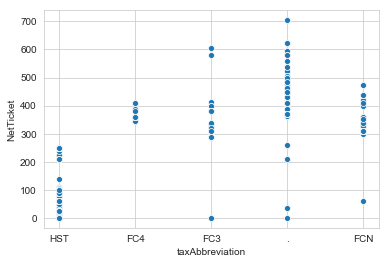

In [42]:
sns.scatterplot(data=sa_original, x='taxAbbreviation', y='NetTicket') 
#possible to see that the company online sales per purchase are higher on NY trips (tax code = . ) than Ontario trips (tax code = HST)
#suggestion: Have the tax by total Sales (instead of per ticket)

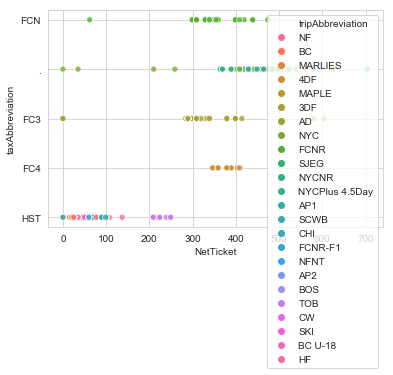

In [43]:
sns.scatterplot(data=sa_original, y='taxAbbreviation', x='NetTicket', hue='tripAbbreviation', alpha=0.8)

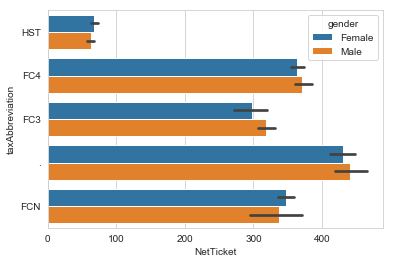

In [44]:
sns.barplot(data=sa_original, y='taxAbbreviation', x='NetTicket', hue='gender')

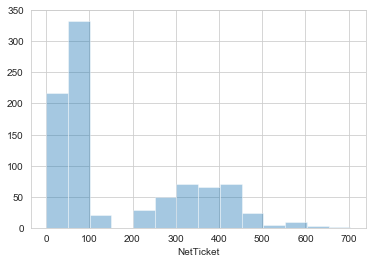

In [46]:
sns.distplot(sa_original['NetTicket'], kde = False) #visualizing the frequency distribution of Sales in dollar increments

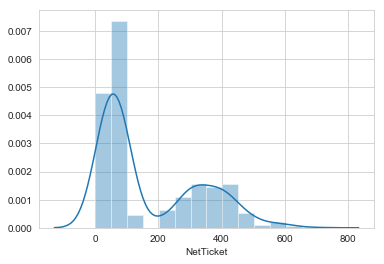

In [47]:
sns.distplot(sa_original['NetTicket']) #area of the histogram is equal to 1

In [49]:
gen = sa_original .groupby(['gender'])['NetTicket'].sum()
print (gen)

gender
Female    97392.0
Male      54956.3
Name: NetTicket, dtype: float64


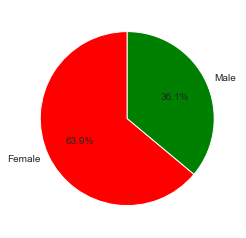

In [50]:
Amount = [97392.0, 54956.3]
Gender = 'Female', 'Male'
colors = ['r', 'g']
plt.pie(Amount, labels=Gender, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

#Majority revenue from online sales comes from females.

In [51]:
#extra reports (future suggeestion)
#fixtriptype = codes
#Age by triptype
#gender by triptype
#age by totalspent
#countrybytotalspent

*Working now with the merged dataset choosen

In [52]:
satot = sa_goo .groupby(['CountryName'])['Sales'].sum() #removed the dates
print (satot)

CountryName
Australia           479.0
Austria              50.0
Belgium             175.0
Brazil            30481.3
Canada            17974.0
Chile                64.0
China               595.0
Colombia           3069.0
Ecuador             334.0
France             2094.0
Germany            7604.0
Hong Kong          1125.0
India              4036.0
Italy              6451.0
Japan              7307.0
Mexico            19056.0
Netherlands          90.0
Nigeria              60.0
Poland              499.0
Singapore           498.0
Spain              1978.0
Switzerland        2359.0
Taiwan             1442.0
Turkey               25.0
Ukraine             268.0
United Kingdom      408.0
United States       468.0
Name: Sales, dtype: float64


In [53]:
type(satot)

pandas.core.series.Series

In [54]:
satot.index

Index(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China',
       'Colombia', 'Ecuador', 'France', 'Germany', 'Hong Kong', 'India',
       'Italy', 'Japan', 'Mexico', 'Netherlands', 'Nigeria', 'Poland',
       'Singapore', 'Spain', 'Switzerland', 'Taiwan', 'Turkey', 'Ukraine',
       'United Kingdom', 'United States'],
      dtype='object', name='CountryName')

In [55]:
satot2= satot.reset_index()
satot2.head()

,CountryName,Sales
0,Australia,479.0
1,Austria,50.0
2,Belgium,175.0
3,Brazil,30481.3
4,Canada,17974.0


In [56]:
satot2.sort_values('Sales', ascending=False, inplace=True) #sort by sales
satot2.head()

,CountryName,Sales
3,Brazil,30481.3
15,Mexico,19056.0
4,Canada,17974.0
10,Germany,7604.0
14,Japan,7307.0


In [57]:
satot3= satot2.reset_index(drop=True) 
satot4 = satot3.iloc[:10,:]
print(satot4)

   CountryName    Sales
0       Brazil  30481.3
1       Mexico  19056.0
2       Canada  17974.0
3      Germany   7604.0
4        Japan   7307.0
5        Italy   6451.0
6        India   4036.0
7     Colombia   3069.0
8  Switzerland   2359.0
9       France   2094.0


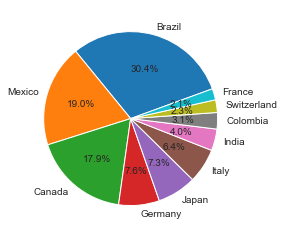

In [58]:
Amount = satot4['Sales']
Label = satot4['CountryName']
plt.pie(Amount, labels=Label , startangle=20, autopct='%.1f%%')
plt.show()

#Countries by Sales (sales that I had online users only)

# Statistics and Probability

In [59]:
http://localhost:8888/notebooks/OneDrive/%C3%81rea%20de%20Trabalho/Learning/FB%20-%20Brainstation/Brainstation%20-%20Final%20Project.ipynb#Statistics-and-Probabilitysa_goo.head()

,Date,CountryName,#OnlineUsers,Sales,#ProductsBought
0,2019-04-05,Japan,1,24.0,1
1,2019-04-05,Brazil,1,168.0,4
2,2019-04-05,Canada,21,59.0,1
3,2019-04-05,Mexico,1,25.0,1
4,2019-04-07,Canada,104,25.0,1


In [60]:
sa_goo.shape

(347, 5)

In [61]:
print(sa_goo.mean())

#OnlineUsers        37.824207
Sales              314.090202
#ProductsBought      1.858790
dtype: float64


In [62]:
print(sa_goo.median())

#OnlineUsers         9.0
Sales              190.0
#ProductsBought      1.0
dtype: float64


In [63]:
print(sa_goo.std())

#OnlineUsers        66.372096
Sales              371.169116
#ProductsBought      1.438610
dtype: float64


In [64]:
print(sa_goo.var())

#OnlineUsers         4405.255135
Sales              137766.512331
#ProductsBought         2.069597
dtype: float64


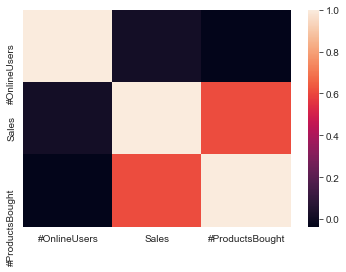

In [65]:
import seaborn as sns
sns.heatmap(sa_goo.corr()) #weak correlation between online users and online sales

In [131]:
inner2 = sa_goo.groupby(['CountryName',])['Sales','#OnlineUsers','#ProductsBought'].sum() #grouping, removing dates
inner2.iloc [:5,:]

,Sales,#OnlineUsers,#ProductsBought
CountryName,,,
Australia,479.0,2,3
Austria,50.0,1,2
Belgium,175.0,11,3
Brazil,30481.3,1304,172
Canada,17974.0,9538,96


In [68]:
inner2.shape

(27, 3)

In [69]:
inner2.describe() #higher std on sales (min 25-max~30k)

,Sales,#OnlineUsers,#ProductsBought
count,27.000000,27.000000,27.000000
mean,4036.640741,486.111111,23.888889
std,7266.353998,1834.658391,40.504827
min,25.000000,1.000000,1.000000
25%,301.000000,2.000000,2.000000
50%,595.000000,11.000000,4.000000
75%,3552.500000,56.000000,22.500000
max,30481.300000,9538.000000,172.000000


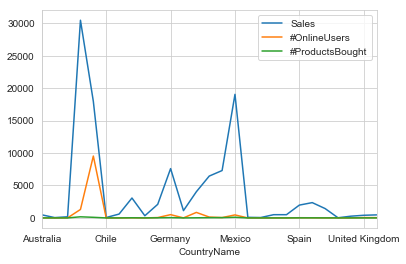

In [70]:
inner2.plot();

In [71]:
gr5 = inner2.drop(['Canada'], axis=0) #dropped Canada since Google Analytics brings the location of the device as a User - not where they're from.
print(gr5)

                  Sales  #OnlineUsers  #ProductsBought
CountryName                                           
Australia         479.0             2                3
Austria            50.0             1                2
Belgium           175.0            11                3
Brazil          30481.3          1304              172
Chile              64.0             1                1
China             595.0             2                2
Colombia         3069.0            21               23
Ecuador           334.0             3                2
France           2094.0            56               22
Germany          7604.0           506               48
Hong Kong        1125.0             6                5
India            4036.0           849               22
Italy            6451.0           135               41
Japan            7307.0            56               48
Mexico          19056.0           462              105
Netherlands        90.0             1                1
Nigeria   

In [72]:
gr5.head()

,Sales,#OnlineUsers,#ProductsBought
CountryName,,,
Australia,479.0,2,3
Austria,50.0,1,2
Belgium,175.0,11,3
Brazil,30481.3,1304,172
Chile,64.0,1,1


In [73]:
gr5.index

Index(['Australia', 'Austria', 'Belgium', 'Brazil', 'Chile', 'China',
       'Colombia', 'Ecuador', 'France', 'Germany', 'Hong Kong', 'India',
       'Italy', 'Japan', 'Mexico', 'Netherlands', 'Nigeria', 'Poland',
       'Singapore', 'Spain', 'Switzerland', 'Taiwan', 'Turkey', 'Ukraine',
       'United Kingdom', 'United States'],
      dtype='object', name='CountryName')

In [74]:
gr6 = gr5.reset_index()
gr6.head()

,CountryName,Sales,#OnlineUsers,#ProductsBought
0,Australia,479.0,2,3
1,Austria,50.0,1,2
2,Belgium,175.0,11,3
3,Brazil,30481.3,1304,172
4,Chile,64.0,1,1


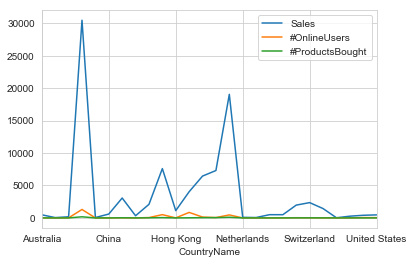

In [75]:
gr5.plot();

In [76]:
gr6.describe() #bc I dropped Canada, std on #Online Sales is lower.

,Sales,#OnlineUsers,#ProductsBought
count,26.000000,26.000000,26.000000
mean,3500.588462,137.961538,21.115385
std,6844.198345,311.586454,38.603966
min,25.000000,1.000000,1.000000
25%,284.500000,2.000000,2.000000
50%,547.000000,10.500000,4.000000
75%,2891.500000,55.000000,22.000000
max,30481.300000,1304.000000,172.000000


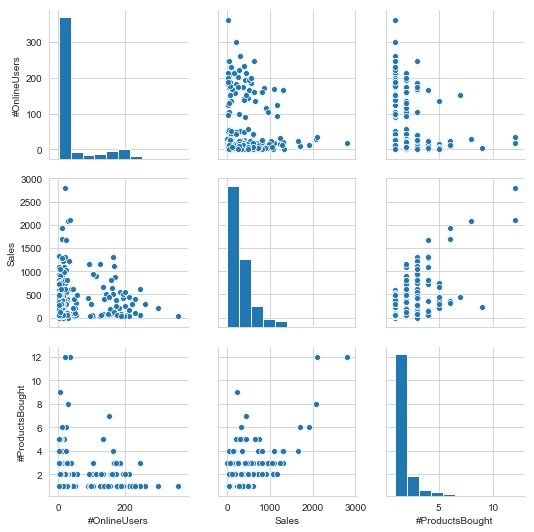

In [77]:
sns.pairplot(sa_goo)

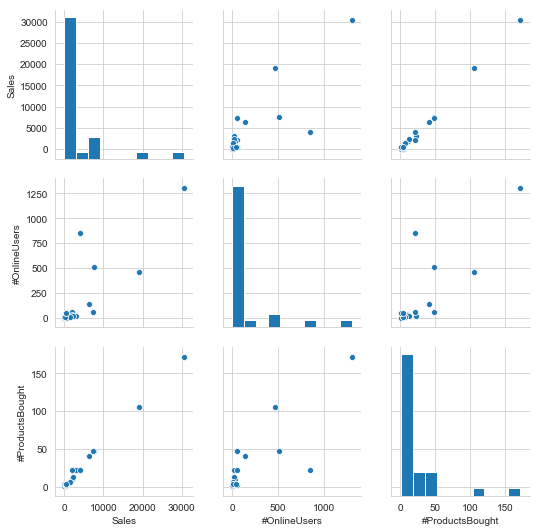

In [78]:
sns.pairplot(gr6) #strong relationship bettween sales and #products, not too good bettween online users and sales

## Modeling

In [79]:
gr6 = gr6[['Sales','CountryName','#OnlineUsers','#ProductsBought']]
gr6.head()

,Sales,CountryName,#OnlineUsers,#ProductsBought
0,479.0,Australia,2,3
1,50.0,Austria,1,2
2,175.0,Belgium,11,3
3,30481.3,Brazil,1304,172
4,64.0,Chile,1,1


In [80]:
convert_dict = {'#OnlineUsers': float, #converted intg to floats
        '#ProductsBought': float} 
  
gr6 = gr6.astype(convert_dict) 
print(gr6.dtypes)

Sales              float64
CountryName         object
#OnlineUsers       float64
#ProductsBought    float64
dtype: object


In [81]:
print(gr5)

                  Sales  #OnlineUsers  #ProductsBought
CountryName                                           
Australia         479.0             2                3
Austria            50.0             1                2
Belgium           175.0            11                3
Brazil          30481.3          1304              172
Chile              64.0             1                1
China             595.0             2                2
Colombia         3069.0            21               23
Ecuador           334.0             3                2
France           2094.0            56               22
Germany          7604.0           506               48
Hong Kong        1125.0             6                5
India            4036.0           849               22
Italy            6451.0           135               41
Japan            7307.0            56               48
Mexico          19056.0           462              105
Netherlands        90.0             1                1
Nigeria   

In [82]:
gr5.shape

(26, 3)

In [83]:
gr6.shape

(26, 4)

In [84]:
gr5.dtypes #found why my regression is not working... have to transform int to float

Sales              float64
#OnlineUsers         int64
#ProductsBought      int64
dtype: object

In [85]:
gr5 = gr5.astype(float)
gr5

,Sales,#OnlineUsers,#ProductsBought
CountryName,,,
Australia,479.0,2.0,3.0
Austria,50.0,1.0,2.0
Belgium,175.0,11.0,3.0
Brazil,30481.3,1304.0,172.0
Chile,64.0,1.0,1.0
China,595.0,2.0,2.0
Colombia,3069.0,21.0,23.0
Ecuador,334.0,3.0,2.0
France,2094.0,56.0,22.0


In [86]:
gr5.dtypes

Sales              float64
#OnlineUsers       float64
#ProductsBought    float64
dtype: object

In [87]:
# defined x and y 
x = gr5.values[:,1:3] # independent variables, Online and Products by country over 3 months
y = gr5.values[:,0:1]  # dependent variable, Sales by country over 3 months    

In [88]:
x.shape

(26, 2)

In [89]:
y.shape

(26, 1)

In [90]:
model = smf.ols(data = gr5, formula = "y ~ x")  
result = model.fit()  
result.summary()

#x[0] has a very low test statistic; as such, we cannot reject the null hypothesis that x=0
#I will run another regression removing x[0] from the list of independent variables.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1983.
Date:                Wed, 18 Sep 2019   Prob (F-statistic):           1.78e-26
Time:                        18:23:45   Log-Likelihood:                -198.97
No. Observations:                  26   AIC:                             403.9
Df Residuals:                      23   BIC:                             407.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -228.3878    121.699     -1.877      0.073    -480.140      23.365
x[0]           0.7346      0.632      1.163      0.257      -0.572       2.042
x[1]         171.8002      5.100     33.686      0.000     161.250     182.350
==============================================================================
Omnibus:                        7.230   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                5.209
Skew:                          -0.977   Prob(JB):                       0.0739
Kurtosis:                       3.994   Cond. No.                         386.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:

x1 = gr5.values[:,2:3]
y1 = gr5.values[:,0]       # defined x and y 

model = smf.ols(data = gr5, formula = "y1 ~ x1")  
result2 = model.fit()  
result2.summary()

#single variable regression, showing sales by country on number of products sold. 
#R-squared close to 1 suggests a very good fit.
#Note, R-squared remain the same from previous model indicating that the inclusion of #Online Users in the model added no predictive ability to the regression
#F-statistic of 3908 also suggests a significant model.
#Based off the T-stat of the coef we can reject the null hypothesis that X=0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     3908.
Date:                Wed, 18 Sep 2019   Prob (F-statistic):           4.32e-28
Time:                        18:23:45   Log-Likelihood:                -199.71
No. Observations:                  26   AIC:                             403.4
Df Residuals:                      24   BIC:                             405.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -231.5705    122.556     -1.890      0.071    -484.513      21.372
x1           176.7507      2.827     62.513      0.000     170.915     182.586
==============================================================================
Omnibus:                        9.591   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                7.749
Skew:                          -1.224   Prob(JB):                       0.0208
Kurtosis:                       4.078   Cond. No.                         49.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
print(y1.shape)
print(y1.shape)

(26,)
(26,)


In [93]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.4, random_state=0)

In [94]:
regres = LinearRegression() 
regres.fit(x1_train, y1_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [95]:
y1_pred = regres.predict(x1_test)

In [96]:
fe = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred})
fe1 = fe.head(25)
print(fe1)

     Actual     Predicted
0     175.0    194.200402
1    2359.0   1958.388552
2   19056.0  18188.919529
3     499.0   -158.637228
4     595.0     17.781587
5    4036.0   3546.157886
6      25.0    370.619217
7    7307.0   8133.047076
8     498.0     17.781587
9    1978.0   1605.550922
10     60.0   -158.637228


In [97]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))



Mean Absolute Error: 477.68737164072996
Mean Squared Error: 285203.3217774909
Root Mean Squared Error: 534.0443069423088


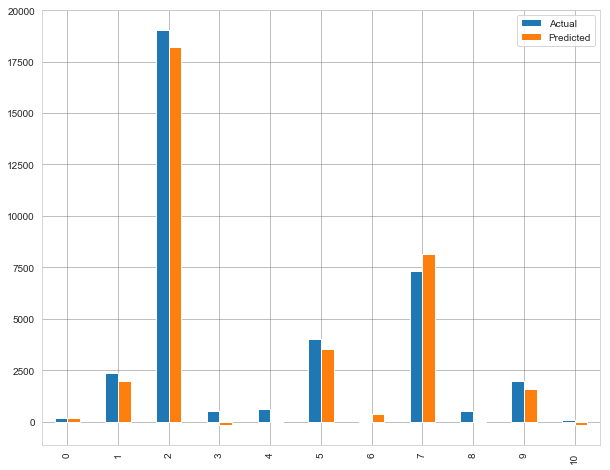

In [98]:
fe1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [99]:
print(y1_test.shape)
print(y1_pred.shape)

(11,)
(11,)


In [100]:
print(y1_test.dtype)
print(y1_pred.dtype)

float64
float64


In [101]:
tempt2 = pd.read_csv('data/tempt2.csv',parse_dates=[1]) #using new template (same dataset) in order to be able to test different variables
tempt2.head()

#canada still removed

,Unnamed: 0,Dily_Sales,#Users_Brazil,#Users_Mexico,#Users_Japan,#Users_Chile,#Users_United States,#Users_Colombia,#Users_India,#Users_Italy,...,#Users_Germany,#Users_United Kingdom,#Users_Australia,#Users_Spain,#Users_Ukraine,#Users_Hong Kong,#Users_Belgium,#Users_Netherlands,#Users_Austria,#Users_Singapore
0,2019-04-05,217,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2019-04-06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2019-04-07,438,0,0,2,1,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2019-04-08,50,0,0,9,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2019-04-09,643,21,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
tempt2.dtypes

Unnamed: 0               object
Dily_Sales               object
#Users_Brazil             int64
#Users_Mexico             int64
#Users_Japan              int64
#Users_Chile              int64
#Users_United States      int64
#Users_Colombia           int64
#Users_India              int64
#Users_Italy              int64
#Users_Turkey             int64
#Users_Taiwan             int64
#Users_Switzerland        int64
#Users_Nigeria            int64
#Users_France             int64
#Users_China              int64
#Users_Ecuador            int64
#Users_Poland             int64
#Users_Germany            int64
#Users_United Kingdom     int64
#Users_Australia          int64
#Users_Spain              int64
#Users_Ukraine            int64
#Users_Hong Kong          int64
#Users_Belgium            int64
#Users_Netherlands        int64
#Users_Austria            int64
#Users_Singapore          int64
dtype: object

In [103]:
tempt2= tempt2.set_index('Unnamed: 0') #set date  as index
tempt2.head()

,Dily_Sales,#Users_Brazil,#Users_Mexico,#Users_Japan,#Users_Chile,#Users_United States,#Users_Colombia,#Users_India,#Users_Italy,#Users_Turkey,...,#Users_Germany,#Users_United Kingdom,#Users_Australia,#Users_Spain,#Users_Ukraine,#Users_Hong Kong,#Users_Belgium,#Users_Netherlands,#Users_Austria,#Users_Singapore
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2019-04-05,217,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-04-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-04-07,438,0,0,2,1,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-04-08,50,0,0,9,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-04-09,643,21,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
tempt2 = tempt2.astype(float)
tempt2.dtypes

Dily_Sales               float64
#Users_Brazil            float64
#Users_Mexico            float64
#Users_Japan             float64
#Users_Chile             float64
#Users_United States     float64
#Users_Colombia          float64
#Users_India             float64
#Users_Italy             float64
#Users_Turkey            float64
#Users_Taiwan            float64
#Users_Switzerland       float64
#Users_Nigeria           float64
#Users_France            float64
#Users_China             float64
#Users_Ecuador           float64
#Users_Poland            float64
#Users_Germany           float64
#Users_United Kingdom    float64
#Users_Australia         float64
#Users_Spain             float64
#Users_Ukraine           float64
#Users_Hong Kong         float64
#Users_Belgium           float64
#Users_Netherlands       float64
#Users_Austria           float64
#Users_Singapore         float64
dtype: object

In [105]:
tempt2.shape

(162, 27)

In [106]:
x3 = tempt2.values[:,1:28]
y3 = tempt2.values[:,0:1]       # defined x and y 

In [107]:
x3.shape

(162, 26)

In [108]:
y3.shape

(162, 1)

In [109]:
model = smf.ols(data = tempt2, formula = "y3 ~ x3")  
result3 = model.fit()  
result3.summary()

#some countries coefficients are significant because they have very low p value
#R-squared suggests not as good fit despite a strong f-stat (implying the model is significant)
# ~40% of the variability in my dependent variable can be explained by variability in my independent variables.
# High confidence that the statement above is true because of my high significance F

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y3   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     4.850
Date:                Wed, 18 Sep 2019   Prob (F-statistic):           5.04e-10
Time:                        18:23:45   Log-Likelihood:                -1235.8
No. Observations:                 162   AIC:                             2526.
Df Residuals:                     135   BIC:                             2609.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.4481     66.583      0.818      0.415     -77.232     186.128
x3[0]         26.4408      4.664      5.670      0.000      17.218      35.664
x3[1]         46.2115      9.630      4.799      0.000      27.166      65.257
x3[2]        127.8054     46.502      2.748      0.007      35.838     219.773
x3[3]         61.1261    570.934      0.107      0.915   -1068.005    1190.257
x3[4]         13.3630     23.471      0.569      0.570     -33.055      59.781
x3[5]         65.4421     97.788      0.669      0.504    -127.953     258.837
x3[6]          2.1255      1.369      1.552      0.123      -0.582       4.833
x3[7]         64.5336     20.796      3.103      0.002      23.406     105.661
x3[8]       -453.8920    368.747     -1.231      0.220   -1183.160     275.375
x3[9]         42.0113    107.735      0.390      0.697    -171.055     255.078
x3[10]        54.2623     71.798      0.756      0.451     -87.733     196.258
x3[11]       231.7035    548.352      0.423      0.673    -852.769    1316.176
x3[12]        88.7438     37.633      2.358      0.020      14.318     163.170
x3[13]      -224.1679    513.211     -0.437      0.663   -1239.142     790.806
x3[14]      -340.7948    252.202     -1.351      0.179    -839.574     157.984
x3[15]       872.1833    548.889      1.589      0.114    -213.351    1957.718
x3[16]         1.3686      2.847      0.481      0.632      -4.262       6.999
x3[17]         2.0897     10.972      0.190      0.849     -19.609      23.789
x3[18]       108.5043    392.773      0.276      0.783    -668.280     885.289
x3[19]         6.1476     53.093      0.116      0.908     -98.854     111.149
x3[20]      -129.7701    134.446     -0.965      0.336    -395.664     136.123
x3[21]       101.7914    145.323      0.700      0.485    -185.613     389.196
x3[22]        54.3916     68.245      0.797      0.427     -80.576     189.360
x3[23]      -531.8027    602.673     -0.882      0.379   -1723.704     660.098
x3[24]      -299.4877    561.134     -0.534      0.594   -1409.239     810.263
x3[25]      1013.4863    725.513      1.397      0.165    -421.355    2448.328
==============================================================================
Omnibus:                       71.596   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              355.241
Skew:                           1.561   Prob(JB):                     7.25e-78
Kurtosis:                       9.548   Cond. No.                         552.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=0)

In [111]:
regres3 = LinearRegression() 
regres3.fit(x3_train, y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [112]:
y3_pred = regres3.predict(x3_test)

In [113]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y3_test, y3_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y3_test, y3_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y3_test, y3_pred)))

Mean Absolute Error: 1563.93247738354
Mean Squared Error: 45161144.747784145
Root Mean Squared Error: 6720.204219202282


In [114]:
tempt3 = pd.read_csv('data/tempt3.csv',parse_dates=[1]) #new doct only with variables that P>|t| are significant
tempt3.head()

#removed the non-significant coeficients 

,Unnamed: 0,Dily_Sales,#Users_Brazil,#Users_Mexico,#Users_Japan,#Users_Italy,#Users_France
0,43560,217,1,1,1,0,0
1,43561,0,0,0,0,0,0
2,43562,438,0,0,2,0,0
3,43563,50,0,0,9,0,0
4,43564,643,21,0,0,0,0


In [115]:
tempt3= tempt3.set_index('Unnamed: 0') #set date  as index

In [116]:
tempt3 = tempt3.astype(float)
tempt3.dtypes


Dily_Sales       float64
#Users_Brazil    float64
#Users_Mexico    float64
#Users_Japan     float64
#Users_Italy     float64
#Users_France    float64
dtype: object

In [117]:
x4 = tempt3.values[:,1:28]
y4 = tempt3.values[:,0:1] 

In [118]:
model = smf.ols(data = tempt3, formula = "y4 ~ x4")  
result4 = model.fit()  
result4.summary()

# dropped variables whose coefficients were not significant
# brought me to a model with not as good fit, however, the model is statisticly significant with a high F-stat and with all coeffcients with p-value less than or equal to 0.006


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y4   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     21.82
Date:                Wed, 18 Sep 2019   Prob (F-statistic):           1.58e-16
Time:                        18:23:45   Log-Likelihood:                -1246.3
No. Observations:                 162   AIC:                             2505.
Df Residuals:                     156   BIC:                             2523.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    115.1172     61.317      1.877      0.062      -6.002     236.236
x4[0]         24.5030      4.396      5.574      0.000      15.819      33.187
x4[1]         46.1724      8.633      5.348      0.000      29.119      63.225
x4[2]        143.8169     39.676      3.625      0.000      65.446     222.188
x4[3]         40.4156     14.118      2.863      0.005      12.528      68.303
x4[4]         99.5156     35.890      2.773      0.006      28.622     170.410
==============================================================================
Omnibus:                       67.923   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.451
Skew:                           1.575   Prob(JB):                     1.02e-57
Kurtosis:                       8.382   Cond. No.                         18.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
x4.shape

(162, 5)

In [120]:
y4.shape

(162, 1)

In [121]:
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.2, random_state=0)

In [122]:
regressor = LinearRegression()  
regressor.fit(x4_train, y4_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [123]:
y4_pred = regressor.predict(x4_test)

In [124]:
print(y4_test.shape)
print(y4_pred.shape)

(33, 1)
(33, 1)


In [125]:
print(y4_test.shape)

(33, 1)


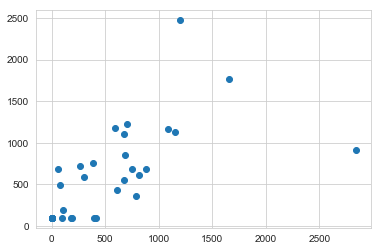

In [126]:
plt.scatter(y4_test,y4_pred)

In [127]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y4_test, y4_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y4_test, y4_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y4_test, y4_pred)))

Mean Absolute Error: 303.22685045483064
Mean Squared Error: 234557.6357445017
Root Mean Squared Error: 484.31150692968436
